# Applied Statistics - **Assessment Problems**

This notebook contains my work undertaken in completing the tasks for the Applied Statistics module.
***

## Problem 1:  Extending the Lady Tasting Tea

![tea](img/vecteezy_ai-generated-tea-cup-cake-and-a-pink-peony_37286987.jpg)

### What is the Lady Tasting Tea experiment about?

The **Lady Tasting Tea** is the famous experiment which demonstrate the foundations of modern statistics, particularly the principles of hypothesis testing, randomisation and controlled 
trials conducted by Ronald Fisher in the early 20th century. The experiment began when an English Lady, Muriel Bristol, claimed that she could tell whether milk had been poured into a cup 
before or after the tea. 

To test her claim, Fisher promptly turned it into an experiment using eight coups of tea, four prepared with milk first and four the other way round, tea first. Muriel was asked to 
identify which cups belong to each group. She had to guess the order based solely on her taste perception and she successfully identified all cups. 

The idea of hypothesis testing introduced by Fisher in this experiment is to determinate if Muriel can genuinely tell the difference between the two types of teas, or if her guesses are 
due to chance. The null hypothesis is that she has no ability to tell the difference and is simply guessing. If the probability of her guesses is very low, the experiment rejects the null 
hypothesis, concluding she can taste the difference. If the probability is high, it suggests her performance could easily be due to chance alone.

### Extending the Lady Tasting Tea experiment

>Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A 
participant claims they can tell which was poured first. Simulate this experiment using numpy by randomly shuffling the cups many times and calculating the probability of the participant 
correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.<br>
>In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or 
relaxing the p-value threshold compared to the original design.

Firstly, I need to import various libraries required to complete this experiment.

In [2]:
# Math function from Python library. 
import math

# Interator function from Python library. 
import itertools

# Random selections. 
import random

# Numerical operation 
import numpy as np

# Data visualization and plotting 
import matplotlib.pyplot as plt 

In the next step I will set out the total cups of tea, the number of cups where the milk is first and number of cups where tea is first.

In [3]:
# Total number of cups 
no_cups = 12

# Tea first cups 
no_tea_first = 8

# Milk first cups 
no_milk_first = 4 

The `math.comb()` function calculates the number of ways to choose `k` items from a set of `n` (total number items in a set) items, without 
repetition and without considering order. It returns number of combination (also known as the binomial coefficient), which is computed using the formula:  `*n! / (k! * (n-k)!)*`. <br>

https://docs.python.org/3/library/math.html#math.comb

In [4]:
# Number of ways of selecting 8 cups with the tea first from the total of 12 cups 
no_ways = math.comb(no_cups, no_tea_first) 
print(f'Number of ways to select cups is: {no_ways}')

Number of ways to select cups is: 495


In [5]:
# Number of ways of selecting 4 cups with the milk first from the total of 12 cups 
no_ways = math.comb(no_cups, no_milk_first) 
print(f'Number of ways to select cups is: {no_ways}')

Number of ways to select cups is: 495


As we can see from above, there is **495** possible combinations in either way.

In [6]:
# The probability of randomly selecting correct cups. 
exact_prob = 1 / no_ways 
print(f'Exact probability of selecting correct cups is: {exact_prob}')

Exact probability of selecting correct cups is: 0.00202020202020202


Ordering of the results

In [7]:
# Labeling the cups
labels = list(range(no_cups)) 
print(f'Printing a set of labels: {labels}')

Printing a set of labels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [8]:
# Showing the different way how to select the cups with the tea first from the total amount of the cups.
# https://www.geeksforgeeks.org/python/python-itertools-combinations-function/
combinations = list(itertools.combinations(labels, no_tea_first)) 

# Selecting the 8 cups randomly
# https://docs.python.org/3/library/random.html#random.sample
labels_tea = random.sample(labels, 8)
labels_tea.sort()
print(f'This is a random sample of the labes where the 8 cups were selected as tea first: {labels_tea}')

This is a random sample of the labes where the 8 cups were selected as tea first: [1, 2, 3, 4, 5, 6, 9, 10]


In [9]:
# Turning the list result into a set.
# https://docs.python.org/3/tutorial/datastructures.html#sets
set(labels_tea)

{1, 2, 3, 4, 5, 6, 9, 10}

In [10]:
# Calculating the overlap between each element and lables_tea set.
no_overlaps = []

# Loop through the combinations.
for combinations in combinations:
  # Turn combinations into a set.
  s1 = set(combinations)
  # Turn labels_tea into a set.
  s2 = set(labels_tea)
  # Figure out where they overlap.
  overlap = s1.intersection(s2)
  # Show the combination and the overlap.
  print(combinations, len(overlap), overlap)
  # Append overlap into no_overlaps.
  no_overlaps.append(len(overlap))

(0, 1, 2, 3, 4, 5, 6, 7) 6 {1, 2, 3, 4, 5, 6}
(0, 1, 2, 3, 4, 5, 6, 8) 6 {1, 2, 3, 4, 5, 6}
(0, 1, 2, 3, 4, 5, 6, 9) 7 {1, 2, 3, 4, 5, 6, 9}
(0, 1, 2, 3, 4, 5, 6, 10) 7 {1, 2, 3, 4, 5, 6, 10}
(0, 1, 2, 3, 4, 5, 6, 11) 6 {1, 2, 3, 4, 5, 6}
(0, 1, 2, 3, 4, 5, 7, 8) 5 {1, 2, 3, 4, 5}
(0, 1, 2, 3, 4, 5, 7, 9) 6 {1, 2, 3, 4, 5, 9}
(0, 1, 2, 3, 4, 5, 7, 10) 6 {1, 2, 3, 4, 5, 10}
(0, 1, 2, 3, 4, 5, 7, 11) 5 {1, 2, 3, 4, 5}
(0, 1, 2, 3, 4, 5, 8, 9) 6 {1, 2, 3, 4, 5, 9}
(0, 1, 2, 3, 4, 5, 8, 10) 6 {1, 2, 3, 4, 5, 10}
(0, 1, 2, 3, 4, 5, 8, 11) 5 {1, 2, 3, 4, 5}
(0, 1, 2, 3, 4, 5, 9, 10) 7 {1, 2, 3, 4, 5, 9, 10}
(0, 1, 2, 3, 4, 5, 9, 11) 6 {1, 2, 3, 4, 5, 9}
(0, 1, 2, 3, 4, 5, 10, 11) 6 {1, 2, 3, 4, 5, 10}
(0, 1, 2, 3, 4, 6, 7, 8) 5 {1, 2, 3, 4, 6}
(0, 1, 2, 3, 4, 6, 7, 9) 6 {1, 2, 3, 4, 6, 9}
(0, 1, 2, 3, 4, 6, 7, 10) 6 {1, 2, 3, 4, 6, 10}
(0, 1, 2, 3, 4, 6, 7, 11) 5 {1, 2, 3, 4, 6}
(0, 1, 2, 3, 4, 6, 8, 9) 6 {1, 2, 3, 4, 6, 9}
(0, 1, 2, 3, 4, 6, 8, 10) 6 {1, 2, 3, 4, 6, 10}
(0, 1, 2, 3, 4, 6, 8

In [11]:
# Showing the overlaps.
print(no_overlaps)

[6, 6, 7, 7, 6, 5, 6, 6, 5, 6, 6, 5, 7, 6, 6, 5, 6, 6, 5, 6, 6, 5, 7, 6, 6, 5, 5, 4, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6, 5, 6, 6, 5, 7, 6, 6, 5, 5, 4, 6, 5, 5, 6, 5, 5, 6, 5, 5, 4, 6, 5, 5, 6, 5, 5, 6, 5, 4, 4, 5, 5, 5, 6, 6, 5, 6, 6, 5, 7, 6, 6, 5, 5, 4, 6, 5, 5, 6, 5, 5, 6, 5, 5, 4, 6, 5, 5, 6, 5, 5, 6, 5, 4, 4, 5, 5, 5, 5, 4, 6, 5, 5, 6, 5, 5, 6, 5, 4, 4, 5, 5, 5, 4, 4, 5, 5, 4, 5, 6, 6, 5, 6, 6, 5, 7, 6, 6, 5, 5, 4, 6, 5, 5, 6, 5, 5, 6, 5, 5, 4, 6, 5, 5, 6, 5, 5, 6, 5, 4, 4, 5, 5, 5, 5, 4, 6, 5, 5, 6, 5, 5, 6, 5, 4, 4, 5, 5, 5, 4, 4, 5, 5, 4, 5, 5, 4, 6, 5, 5, 6, 5, 5, 6, 5, 4, 4, 5, 5, 5, 4, 4, 5, 5, 4, 5, 4, 4, 5, 5, 4, 4, 5, 6, 6, 5, 6, 6, 5, 7, 6, 6, 5, 5, 4, 6, 5, 5, 6, 5, 5, 6, 5, 5, 4, 6, 5, 5, 6, 5, 5, 6, 5, 4, 4, 5, 5, 5, 5, 4, 6, 5, 5, 6, 5, 5, 6, 5, 4, 4, 5, 5, 5, 4, 4, 5, 5, 4, 5, 5, 4, 6, 5, 5, 6, 5, 5, 6, 5, 4, 4, 5, 5, 5, 4, 4, 5, 5, 4, 5, 4, 4, 5, 5, 4, 4, 5, 5, 4, 6, 5, 5, 6, 5, 5, 6, 5, 4, 4, 5, 5, 5, 4, 4, 5, 5, 4, 5, 4, 4, 5, 5, 4, 4, 5, 4, 4, 5, 5, 4, 4, 4, 6, 7, 7, 

In [12]:
# Counting how many times the overplap occures and showing the results.
counts = np.unique(no_overlaps, return_counts=True)
#Showing resunts.
counts

(array([4, 5, 6, 7, 8]), array([ 70, 224, 168,  32,   1]))

The `return_counts=True` will tell how many times the random values (4, 5, 6, 7, 8) will appear in the list. <br>As we can see the number 5 will appear in the list 224 times. Which means that 
the random guessing most often leads to 5 correct identifications.

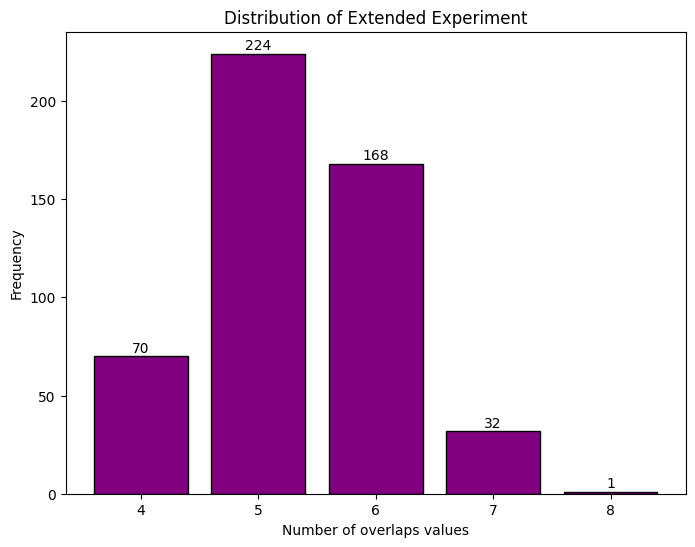

In [13]:
# Plotting the results.

fig, ax = plt.subplots(figsize= (8,6))
ax.bar(counts[0], counts[1], color='purple', edgecolor='black')
for x, y in zip(counts[0], counts[1]):
    ax.text(x, y + 2, str(y), ha='center')

ax.set_title("Distribution of Extended Experiment")
ax.set_xlabel("Number of overlaps values")
ax.set_ylabel("Frequency")

plt.show()

### Numpy simulation

I will define an array of 12 cups which will combined the 8 cups with the tea first and 4 cups with milk first. Then I will simulate the experiment 1,000,000 times to get a reliable estimate of the probability.

In [14]:
# Set the random seed to make sure the results stay same each time the code is run 
np.random.seed(100) 
 
# Number of simulations 
num_simulations = 1000000

# Define an array 
array_cups = np.array(['tea']* no_tea_first + ['milk']* no_milk_first) 
 
# This will count how many times the participant guesses all 12 cups correctly 
correct_guesses = 0 
 
''' For each simulation 
actual: randomly shuffles the 12 cups to simulate the real arrangement 
guess: also shuffles of the same 12 cups '''
for _in in range(num_simulations):
    actual = np.random.permutation(array_cups)
    guess= np.random.permutation(array_cups)
    #check if the guess matches the actual arangement, if so it's coutned as success.
    if np.array_equal(actual, guess):
        correct_guesses += 1

# Calculate the probability
probability = correct_guesses /num_simulations
print (f'Probability of correctly indetifying all cups by chance is: {probability}')

Probability of correctly indetifying all cups by chance is: 0.002045


### Comparison with Fisher (8 cups) experiment

Fisher's original experiment used 8 cups, 4 with tea first and 4 with milk first. The total number of ways to choose 4 cups out of 8 cups is 70 (1/70), and the probability of a perfect guess by chance (all 4 cups correctly) is 0.0143 (1/70) or 1.43%. This low probability provides strong evidence against random guessing if the participant achieves all 4 correctly. <br>

In an extended experiment, I used a total of 12 cups, 8 with tea first and 4 with milk first. The total number of ways to choose 8 cups out of 12 cups is 495, and the probability is 0.002 (1/495) or 0.2%.  This makes a perfect guess even less likely, reinforcing that such an outcome would be extremely unlikely just by chance, and makes it more of a theoretical demonstration. <br>

In [15]:
# Function to simulate the correct milk first cups.
def simulate_counts(no_cups, no_tea_first, num_simulations):
    counts_correct = []
    for _ in range(num_simulations):
        # Randomly choose which cups are milk-first in the true setup
        true_milk = set(random.sample(range(no_cups), no_cups - no_tea_first))
        
        # Randomly choose which cups the participant guesses as milk-first
        guess_milk = set(random.sample(range(no_cups), no_cups - no_tea_first))
        
        # Count how many guesses are correct
        num_correct = len(true_milk.intersection(guess_milk))
        counts_correct.append(num_correct)
    return counts_correct

In [16]:
# Fisher's Original Experiment (8 cups: 4 tea-first, 4 milk-first)
counts_8 = simulate_counts(8, 4, num_simulations)
prob_8 = counts_8.count(4) / num_simulations
print(f"Fisher's Experiment (8 cups): Probability of perfect guess = {prob_8:.6%}")

Fisher's Experiment (8 cups): Probability of perfect guess = 1.435700%


In [17]:
# Extended Experiment (12 cups: 8 tea-first, 4 milk-first)
counts_12 = simulate_counts(12, 8, num_simulations)
prob_12 = counts_12.count(4) / num_simulations
print(f"Extended Experiment (12 cups): Probability of perfect guess = {prob_12:.6%}")

Extended Experiment (12 cups): Probability of perfect guess = 0.193900%


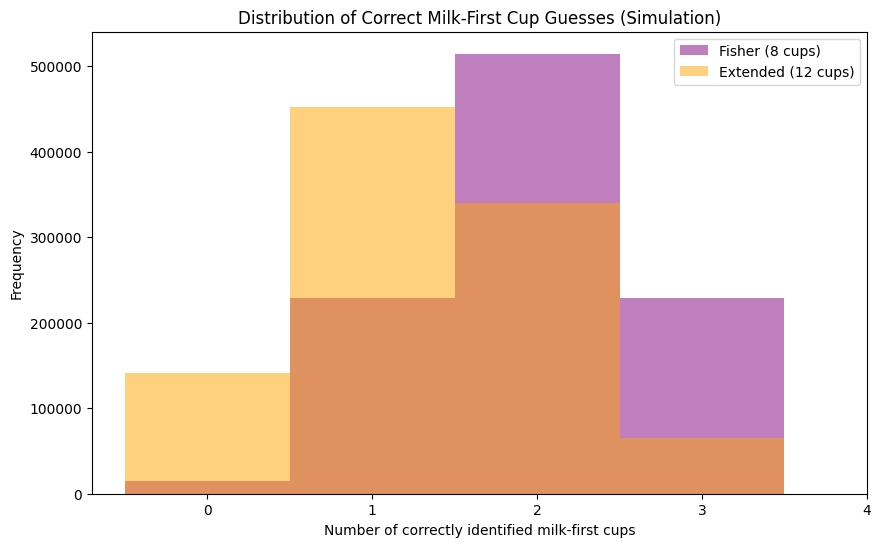

In [18]:
# Plot the milk first cups correctly identified.
bins_8 = np.arange(0, 5) - 0.5   # Fisher (0-4 correct)
bins_12 = np.arange(0, 5) - 0.5  # Extended (0-4 correct, max milk-first is 4)

plt.figure(figsize=(10,6))
plt.hist(counts_8, bins=bins_8, alpha=0.5, color='purple', label="Fisher (8 cups)")
plt.hist(counts_12, bins=bins_12, alpha=0.5, color='orange', label="Extended (12 cups)")

plt.xticks(range(5))
plt.xlabel("Number of correctly identified milk-first cups")
plt.ylabel("Frequency")
plt.title("Distribution of Correct Milk-First Cup Guesses (Simulation)")
plt.legend()
plt.show()

In [19]:
# Function to simulate the correct tea first cups.
def simulate_tea_correct(no_cups, no_tea_first, num_simulations):
    counts_correct = []
    for _ in range(num_simulations):
        true_tea = set(random.sample(range(no_cups), no_tea_first))
        guess_tea = set(random.sample(range(no_cups), no_tea_first))
        num_correct = len(true_tea.intersection(guess_tea))
        counts_correct.append(num_correct)
    return counts_correct

In [20]:
# Simulate both experiments.
counts_8_fisher = simulate_tea_correct(8, 4, num_simulations) # 4 tea first cups
counts_12_extended = simulate_tea_correct(12, 8, num_simulations) # 8 tea first cups

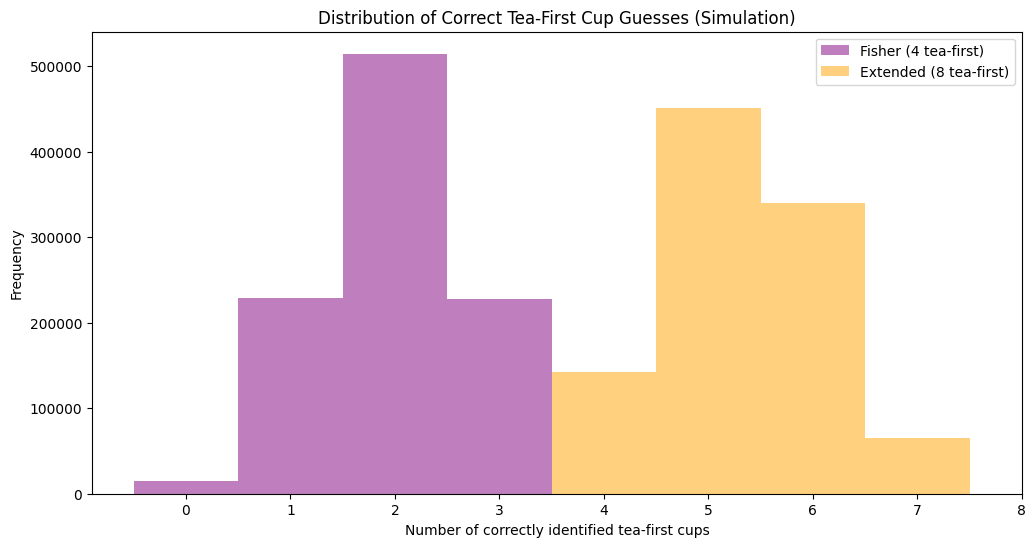

In [21]:
# Plot the tea first cups correctly identified.
bins_8_fisher = np.arange(0, 5) - 0.5     # Fisher (0–4 correct)
bins_12_extended = np.arange(0, 9) - 0.5   # Extended (0–8 correct)

plt.figure(figsize=(12,6))
plt.hist(counts_8_fisher, bins=bins_8_fisher, alpha=0.5, color='purple', label="Fisher (4 tea-first)")
plt.hist(counts_12_extended, bins=bins_12_extended, alpha=0.5, color='orange', label="Extended (8 tea-first)")

plt.xticks(range(0, 9))
plt.xlabel("Number of correctly identified tea-first cups")
plt.ylabel("Frequency")
plt.title("Distribution of Correct Tea-First Cup Guesses (Simulation)")
plt.legend()
plt.show()

### Conclusion

In Fisher’s original tea tasting experiment with 8 cups, the probability of a perfect guess purely by chance is **1/70 ≈ 1.43%**. In the extended experiment (12 cups), this probability becomes **1/495 ≈ 0.2%.**<br>

A **p-value** is a measure used in statistics to decide whether the results of an experiment are likely due to chance or reflect a real effect. The **5% threshold (often written as α=0.05)** represents the researcher’s tolerance for error — it means being willing to accept a 5% chance of wrongly concluding that an effect exists.<br>

By increasing the number of cups from 8 to 12, there are many more possible combinations, so it becomes much harder to guess them all correctly by chance.

In the 12-cup experiment, the p-value of 0.002 (0.2%) means there is only a 0.2% chance that someone could get all cups right just by guessing. Because this is much smaller than 5%, the result is **statistically significant**. It gives even **stronger evidence** that the person can really tell the difference, not just guessing.

You can find more information about the **null hypothesis** at this [link](https://en.wikipedia.org/wiki/Null_hypothesis).<br>
For an explanation of **Type I** and **Type II** errors, see this [article](https://www.scribbr.com/statistics/type-i-and-type-ii-errors/).

### End